In [1]:
import pandas as pd
import sys  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
pd.set_option('display.max_rows', None)  # 행 제한 해제
pd.set_option('display.max_columns', None)  # 열 제한 해제
pd.set_option('display.width', None)  # 너비 제한 해제

In [3]:
import platform
import matplotlib.pyplot as plt
from matplotlib import rc

def set_korean_font():
    os_name = platform.system()

    if os_name == "Darwin":        # macOS
        rc("font", family="AppleGothic")
    elif os_name == "Windows":     # Windows
        rc("font", family="Malgun Gothic")   # 윈도우 기본 한글 글꼴
    else:                          # Linux 등
        # 시스템에 설치된 한글 글꼴 예시 ─ 필요시 apt/yum, brew, winget 등으로 설치
        rc("font", family="NanumGothic")

    # 마이너스 기호가 ◻ 로 나오는 문제 방지
    plt.rcParams["axes.unicode_minus"] = False

# 호출
set_korean_font()

In [4]:
df = pd.read_csv('../data/train.csv')


df.head()


,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.0,5794.80
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.0,5591.85
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.0,5338.17
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.0,4554.42
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.0,3602.25


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(°C)         204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [6]:
building = pd.read_csv('../data/building_info.csv')



building.head()


,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,호텔,82912.71,77586.00,-,-,-
1,2,상용,40658.90,30392.82,-,-,-
2,3,병원,560431.00,418992.00,278.58,-,-
3,4,호텔,41813.29,23715.71,-,-,-
4,5,학교,403749.39,248507.00,1983.05,1025,250


In [7]:
# '-' 처리 및 숫자형 변환 + 결측치 채우기
# 0으로 바꾼 이유는 태양광, ESS, PCS 용량이 없는 건물도 있을 수 있기 때문
# 중앙값이나 평균값으로 채우는 방법도 있지만, 이 경우에는 0으로 처리
for col in ['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']:
    building[col] = pd.to_numeric(building[col].replace('-', np.nan))
    building[col] = building[col].fillna(0)

# 필요한 열만 추출
static_features = building[['건물번호', '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']]

# merge 수행 (왼쪽 기준: df)
merged_df = df.merge(static_features, on='건물번호', how='left')


In [8]:


counts = df['강수량(mm)'].value_counts()
print(counts)

강수량(mm)
0.0      185388
0.1        2449
0.2        1592
0.3        1178
0.4         893
0.5         860
0.7         676
0.6         593
0.8         468
0.9         380
1.0         358
1.1         322
1.4         285
1.5         282
1.2         278
1.9         275
1.3         249
1.7         215
1.6         199
1.8         185
2.7         161
2.2         153
2.3         150
2.6         146
3.5         146
2.9         145
2.8         144
2.1         136
3.0         136
2.4         135
3.7         131
3.6         130
3.3         123
3.8         123
3.2         122
2.5         122
3.1         119
3.4         115
4.0         112
2.0          99
4.9          87
4.8          83
4.1          82
3.9          81
8.1          78
4.5          77
4.4          76
5.2          76
5.1          72
7.2          72
5.0          71
5.5          70
5.9          69
5.6          65
7.7          63
7.3          61
4.6          59
4.2          56
12.3         52
6.4          51
14.0         51
6.1          51


In [9]:
# merge 제대로 되었는지 확인
print(merged_df.columns)
print(merged_df.head())


Index(['num_date_time', '건물번호', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)', '태양광용량(kW)', 'ESS저장용량(kWh)',
       'PCS용량(kW)'],
      dtype='object')
   num_date_time  건물번호           일시  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  일조(hr)  \
0  1_20240601 00     1  20240601 00    18.3      0.0      2.6   82.0     0.0   
1  1_20240601 01     1  20240601 01    18.3      0.0      2.7   82.0     0.0   
2  1_20240601 02     1  20240601 02    18.1      0.0      2.6   80.0     0.0   
3  1_20240601 03     1  20240601 03    18.0      0.0      2.6   81.0     0.0   
4  1_20240601 04     1  20240601 04    17.8      0.0      1.3   81.0     0.0   

   일사(MJ/m2)  전력소비량(kWh)  태양광용량(kW)  ESS저장용량(kWh)  PCS용량(kW)  
0        0.0     5794.80        0.0           0.0        0.0  
1        0.0     5591.85        0.0           0.0        0.0  
2        0.0     5338.17        0.0           0.0        0.0  
3        0.0     4554.42        0.0           0.0        0.0  
4        

In [10]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(°C)         204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(°C)         16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 918.9+ KB


In [12]:
train = train.drop(columns=['일조(hr)', '일사(MJ/m2)'])  # 일조와 일사 열 제거

train['is_train'] = 1
test['is_train'] = 0

combined_df = pd.concat([train, test], ignore_index=True)

combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220800 entries, 0 to 220799
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  220800 non-null  object 
 1   건물번호           220800 non-null  int64  
 2   일시             220800 non-null  object 
 3   기온(°C)         220800 non-null  float64
 4   강수량(mm)        220800 non-null  float64
 5   풍속(m/s)        220800 non-null  float64
 6   습도(%)          220800 non-null  float64
 7   전력소비량(kWh)     204000 non-null  float64
 8   is_train       220800 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.2+ MB


In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220800 entries, 0 to 220799
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  220800 non-null  object 
 1   건물번호           220800 non-null  int64  
 2   일시             220800 non-null  object 
 3   기온(°C)         220800 non-null  float64
 4   강수량(mm)        220800 non-null  float64
 5   풍속(m/s)        220800 non-null  float64
 6   습도(%)          220800 non-null  float64
 7   전력소비량(kWh)     204000 non-null  float64
 8   is_train       220800 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.2+ MB


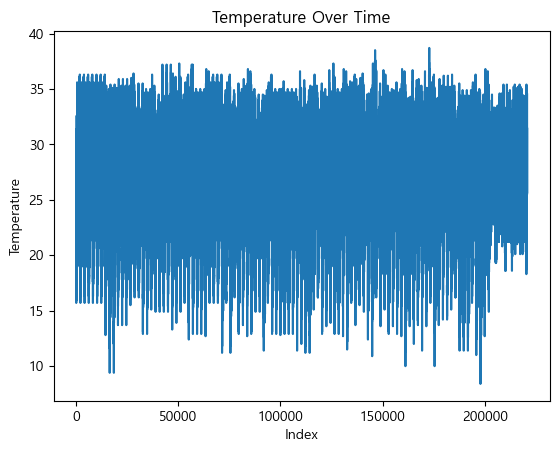

In [14]:
temp = combined_df['기온(°C)'] 

sns.lineplot(x=temp.index, y=temp.values)
plt.title('Temperature Over Time')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.show()


Text(0.5, 1.0, 'Temperature Distribution')

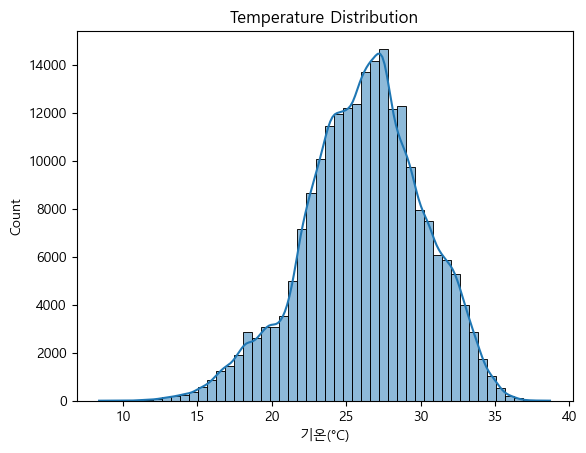

In [15]:
sns.histplot(temp, kde=True, bins=50)
plt.title('Temperature Distribution')

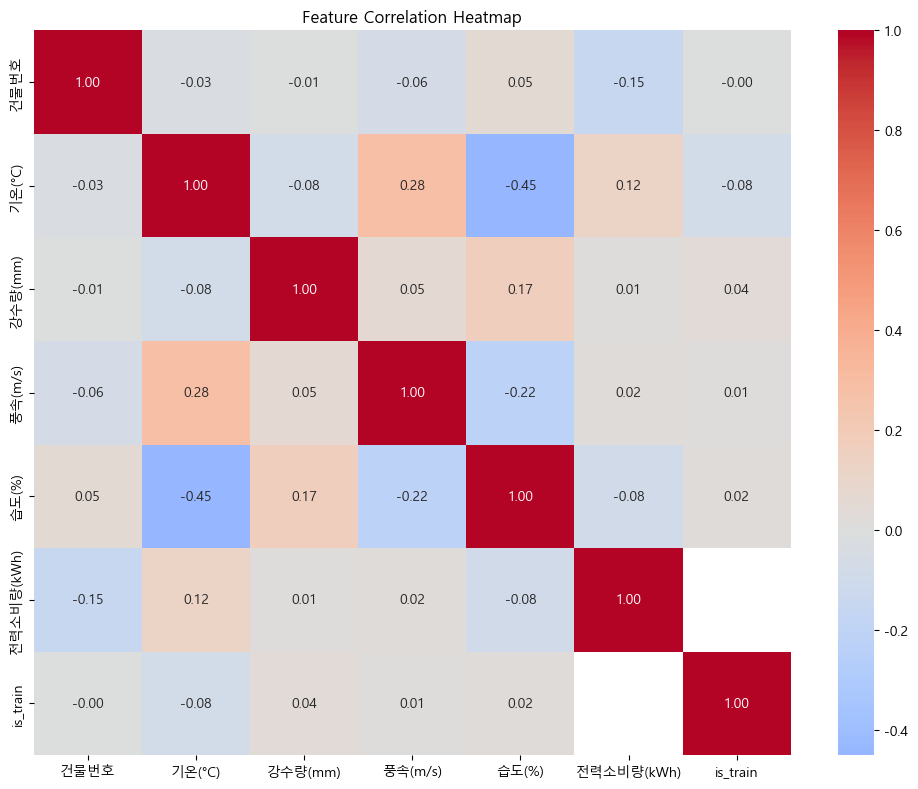

In [16]:

# 수치형 열만 추출 (문자형, 날짜형 제외)
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns

# 상관계수 행렬
corr = combined_df[numeric_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [17]:

# 2. '-' 값을 NaN으로, 그 후 0으로 대체
cols_to_convert = ['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']
for col in cols_to_convert:
    building[col] = pd.to_numeric(building[col].replace('-', np.nan))
    building[col] = building[col].fillna(0)

# 3. 필요한 열만 merge
merged_df = combined_df.merge(
    building[['건물번호'] + cols_to_convert],
    on='건물번호',
    how='left'
)

In [18]:
print(merged_df[cols_to_convert].describe())  # 값 분포 확인
print(merged_df.isnull().sum())              # NaN 여부 확인


           태양광용량(kW)  ESS저장용량(kWh)      PCS용량(kW)
count  220800.000000  220800.00000  220800.000000
mean      231.792200     116.30800      58.270000
std       419.067099     455.25775     219.863812
min         0.000000       0.00000       0.000000
25%         0.000000       0.00000       0.000000
50%        28.125000       0.00000       0.000000
75%       228.670000       0.00000       0.000000
max      1983.050000    3100.00000    1500.000000
num_date_time        0
건물번호                 0
일시                   0
기온(°C)               0
강수량(mm)              0
풍속(m/s)              0
습도(%)                0
전력소비량(kWh)       16800
is_train             0
태양광용량(kW)            0
ESS저장용량(kWh)         0
PCS용량(kW)            0
dtype: int64


In [19]:
merged_df['일시'] = pd.to_datetime(merged_df['일시'], format='%Y%m%d %H')


In [20]:

# 2. 시간 기반 파생 피처
merged_df['hour'] = merged_df['일시'].dt.hour                   # 시간대 (0~23)
merged_df['dayofweek'] = merged_df['일시'].dt.dayofweek         # 요일 (월=0 ~ 일=6)
merged_df['month'] = merged_df['일시'].dt.month                 # 월 (1~12)
merged_df['is_weekend'] = (merged_df['dayofweek'] >= 5).astype(int)  # 주말 여부

# 3. 계절 정보
def get_season(month):
    if month in [3, 4, 5]: return 1  # 봄
    elif month in [6, 7, 8]: return 2  # 여름
    elif month in [9, 10, 11]: return 3  # 가을
    else: return 4  # 겨울

merged_df['season'] = merged_df['month'].map(get_season)

# 4. 설비 설치 여부 (0/1)
merged_df['has_solar'] = (merged_df['태양광용량(kW)'] > 0).astype(int)
merged_df['has_ess'] = (merged_df['ESS저장용량(kWh)'] > 0).astype(int)
merged_df['has_pcs'] = (merged_df['PCS용량(kW)'] > 0).astype(int)

# 5. 상호작용 피처 (기온 × 설비)
merged_df['기온x태양광'] = merged_df['기온(°C)'] * merged_df['has_solar']
merged_df['기온xESS'] = merged_df['기온(°C)'] * merged_df['has_ess']

# 6. 체감온도 (Simplified version)
merged_df['체감온도'] = merged_df['기온(°C)'] - ((0.55 - 0.0055 * merged_df['습도(%)']) * (merged_df['기온(°C)'] - 14.5))

# 7. 불쾌지수 (Discomfort Index)
merged_df['불쾌지수'] = 0.81 * merged_df['기온(°C)'] + 0.01 * merged_df['습도(%)'] * (0.99 * merged_df['기온(°C)'] - 14.3) + 46.3

# 8. 전력소비량은 train에만 존재하므로 제외 대상
# 9. 최종적으로 사용하지 않을 열 제거 가능

In [21]:
merged_df.info()  # 최종 데이터프레임 정보 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220800 entries, 0 to 220799
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num_date_time  220800 non-null  object        
 1   건물번호           220800 non-null  int64         
 2   일시             220800 non-null  datetime64[ns]
 3   기온(°C)         220800 non-null  float64       
 4   강수량(mm)        220800 non-null  float64       
 5   풍속(m/s)        220800 non-null  float64       
 6   습도(%)          220800 non-null  float64       
 7   전력소비량(kWh)     204000 non-null  float64       
 8   is_train       220800 non-null  int64         
 9   태양광용량(kW)      220800 non-null  float64       
 10  ESS저장용량(kWh)   220800 non-null  float64       
 11  PCS용량(kW)      220800 non-null  float64       
 12  hour           220800 non-null  int32         
 13  dayofweek      220800 non-null  int32         
 14  month          220800 non-null  int32         
 15  

In [22]:
merged_df.head()  # 최종 데이터프레임 확인


,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),is_train,태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),hour,dayofweek,month,is_weekend,season,has_solar,has_ess,has_pcs,기온x태양광,기온xESS,체감온도,불쾌지수
0,1_20240601 00,1,2024-06-01 00:00:00,18.3,0.0,2.6,82.0,5794.80,1,0.0,0.0,0.0,0,5,6,1,2,0,0,0,0.0,0.0,17.92380,64.25294
1,1_20240601 01,1,2024-06-01 01:00:00,18.3,0.0,2.7,82.0,5591.85,1,0.0,0.0,0.0,1,5,6,1,2,0,0,0,0.0,0.0,17.92380,64.25294
2,1_20240601 02,1,2024-06-01 02:00:00,18.1,0.0,2.6,80.0,5338.17,1,0.0,0.0,0.0,2,5,6,1,2,0,0,0,0.0,0.0,17.70400,63.85620
3,1_20240601 03,1,2024-06-01 03:00:00,18.0,0.0,2.6,81.0,4554.42,1,0.0,0.0,0.0,3,5,6,1,2,0,0,0,0.0,0.0,17.63425,63.73120
4,1_20240601 04,1,2024-06-01 04:00:00,17.8,0.0,1.3,81.0,3602.25,1,0.0,0.0,0.0,4,5,6,1,2,0,0,0,0.0,0.0,17.45515,63.40882


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
import lightgbm as lgbm
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

# === Configuration ===
CONFIG = {
    'use_gpu': False,  # GPU 사용 여부 (False로 설정하여 호환성 보장)
    'cv_folds': 5,    # Cross Validation fold 수
    'random_state': 42,
    'verbose': False,
    
    # Model Parameters
    'lgbm_params': {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'num_leaves': 63,
        'learning_rate': 0.05,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'min_child_samples': 20,
        'reg_alpha': 0.1,
        'reg_lambda': 0.1,
        'n_estimators': 1000,
        'random_state': 42,
        'device_type': 'gpu',  # GPU 설정을 CPU로 변경
        'verbose': -1,
        'early_stopping_rounds': 100
    },
    
    'xgb_params': {
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'max_depth': 6,
        'learning_rate': 0.05,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'min_child_weight': 1,
        'reg_alpha': 0.1,
        'reg_lambda': 0.1,
        'n_estimators': 1000,
        'random_state': 42,
        'tree_method': 'gpu_hist',  # GPU 설정을 hist로 변경
        'verbosity': 0,
        'early_stopping_rounds': 100
    },
    
    'cat_params': {
        'objective': 'MAE',
        'iterations': 1000,
        'learning_rate': 0.03,  # 0.05 → 0.03으로 낮춤
        'depth': 5,             # 6 → 5로 낮춤
        'l2_leaf_reg': 5,       # 3 → 5로 높임
        'random_strength': 0.05, # 0.1 → 0.05로 낮춤
        'bagging_temperature': 0.8, # 1 → 0.8로 낮춤
        'border_count': 128,     # 254 → 128로 낮춤
        'random_state': 42,
        'task_type': 'GPU',
        'verbose': False,
        'early_stopping_rounds': 100
    }
}

# === 평가 지표 ===
def smape(y_true, y_pred):
    """SMAPE (Symmetric Mean Absolute Percentage Error) 계산"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def mape(y_true, y_pred):
    """MAPE 계산"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def rmse(y_true, y_pred):
    """RMSE 계산"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

# === 데이터 전처리 ===
class DataPreprocessor:
    def __init__(self, scale_features=True, scaler_type='robust'):
        self.scale_features = scale_features
        self.scaler_type = scaler_type
        self.scaler = None
        
        if scale_features:
            if scaler_type == 'standard':
                self.scaler = StandardScaler()
            elif scaler_type == 'robust':
                self.scaler = RobustScaler()
    
    def prepare_data(self, df):
        """데이터를 훈련/테스트로 분리하고 전처리"""
        drop_cols = ['num_date_time', '일시', 'is_train']
        target_col = '전력소비량(kWh)'
        
        # 훈련/테스트 데이터 분리
        train_df = df[df['is_train'] == 1].copy()
        test_df = df[df['is_train'] == 0].copy()
        
        # 특성과 타겟 분리
        X_train = train_df.drop(columns=drop_cols + [target_col])
        y_train = train_df[target_col]
        X_test = test_df.drop(columns=drop_cols + [target_col])
        
        print(f"훈련 데이터 크기: {X_train.shape}")
        print(f"테스트 데이터 크기: {X_test.shape}")
        print(f"타겟 통계: min={y_train.min():.2f}, max={y_train.max():.2f}, mean={y_train.mean():.2f}")
        
        # 특성 스케일링
        if self.scale_features:
            print(f"특성 스케일링 적용: {self.scaler_type}")
            X_train_scaled = pd.DataFrame(
                self.scaler.fit_transform(X_train),
                columns=X_train.columns,
                index=X_train.index
            )
            X_test_scaled = pd.DataFrame(
                self.scaler.transform(X_test),
                columns=X_test.columns,
                index=X_test.index
            )
            return X_train_scaled, y_train, X_test_scaled, X_train, X_test
        else:
            return X_train, y_train, X_test, X_train, X_test

# === 모델 학습기 ===
class ModelTrainer:
    def __init__(self, config):
        self.config = config
        self.models = {}
        self.oof_predictions = {}
        self.test_predictions = {}
        self.scores = {}
    
    def get_model(self, model_name, params):
        """모델 인스턴스 생성"""
        if model_name == 'lgbm':
            return LGBMRegressor(**params)
        elif model_name == 'xgb':
            return XGBRegressor(**params)
        elif model_name == 'cat':
            return CatBoostRegressor(**params)
        else:
            raise ValueError(f"Unknown model: {model_name}")
    
    def cross_validate_model(self, model_name, X_train, y_train, X_test, params):
        """단일 모델에 대한 교차 검증"""
        kf = KFold(n_splits=self.config['cv_folds'], shuffle=True, 
                   random_state=self.config['random_state'])
        
        oof_preds = np.zeros(len(X_train))
        test_preds = np.zeros(len(X_test))
        scores = []
        
        print(f"\n=== {model_name.upper()} 교차 검증 ===")
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
            print(f"Fold {fold + 1}/{self.config['cv_folds']} 처리 중...")
            
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            # 모델 훈련
            model = self.get_model(model_name, params)
            
            if model_name == 'lgbm':
                model.fit(
                    X_tr, y_tr,
                    eval_set=[(X_val, y_val)],
                    callbacks=[lgbm.log_evaluation(period=0)]
                )
            elif model_name == 'xgb':
                model.fit(
                    X_tr, y_tr,
                    eval_set=[(X_val, y_val)],
                    verbose=False
                )
            else:  # catboost
                model.fit(
                    X_tr, y_tr,
                    eval_set=(X_val, y_val),
                    verbose=False
                )
            
            # 예측
            val_pred = model.predict(X_val)
            oof_preds[val_idx] = val_pred
            
            # 점수 계산
            fold_score = smape(y_val, val_pred)
            scores.append(fold_score)
            
            print(f"  Fold {fold + 1} SMAPE: {fold_score:.4f}")
            
            # 테스트 예측 누적
            test_preds += model.predict(X_test) / self.config['cv_folds']
        
        avg_score = np.mean(scores)
        std_score = np.std(scores)
        
        print(f"  평균 SMAPE: {avg_score:.4f} (±{std_score:.4f})")
        
        return oof_preds, test_preds, avg_score, std_score
    
    def train_all_models(self, X_train, y_train, X_test, X_train_original, X_test_original):
        """모든 모델 훈련"""
        model_configs = {
            'lgbm': (self.config['lgbm_params'], X_train, X_test),  # 스케일된 데이터
            'xgb': (self.config['xgb_params'], X_train_original, X_test_original),  # 원본 데이터
            'cat': (self.config['cat_params'], X_train_original, X_test_original)   # 원본 데이터
        }
        
        for model_name, (params, X_tr, X_te) in model_configs.items():
            oof_pred, test_pred, avg_score, std_score = self.cross_validate_model(
                model_name, X_tr, y_train, X_te, params
            )
            
            self.oof_predictions[model_name] = oof_pred
            self.test_predictions[model_name] = test_pred
            self.scores[model_name] = {'mean': avg_score, 'std': std_score}
    
    def get_ensemble_weights(self, method='inverse_score'):
        if method == 'inverse_score':
            scores = [self.scores[model]['mean'] for model in ['lgbm', 'xgb', 'cat']]
            # 성능이 너무 나쁜 모델은 제외
            if max(scores) - min(scores) > 5:  # 성능 차이가 5% 이상이면
                best_model = min(scores)
                weights = np.array([0.6, 0.4, 0.0])  # 상위 2개만 사용
            else:
                weights = 1 / np.array(scores)
                weights = weights / weights.sum()
        return weights

# === 앙상블 매니저 ===
class EnsembleManager:
    def __init__(self, trainer):
        self.trainer = trainer
        self.ensemble_predictions = {}
        self.ensemble_scores = {}
    
    def calculate_ensemble_oof_score(self, method_name, weights=None):
        """앙상블 방법의 OOF 점수 계산"""
        if method_name == 'weighted':
            if weights is None:
                weights = self.trainer.get_ensemble_weights('inverse_score')
            ensemble_oof = (
                weights[0] * self.trainer.oof_predictions['lgbm'] +
                weights[1] * self.trainer.oof_predictions['xgb'] +
                weights[2] * self.trainer.oof_predictions['cat']
            )
        elif method_name == 'stacked':
            # 스태킹의 경우 실제 메타 모델을 다시 학습해서 계산해야 하지만
            # 여기서는 단순화해서 가중 평균 점수를 사용
            weights = self.trainer.get_ensemble_weights('inverse_score')
            ensemble_oof = (
                weights[0] * self.trainer.oof_predictions['lgbm'] +
                weights[1] * self.trainer.oof_predictions['xgb'] +
                weights[2] * self.trainer.oof_predictions['cat']
            )
        elif method_name == 'blended':
            scores = [self.trainer.scores[model]['mean'] for model in ['lgbm', 'xgb', 'cat']]
            inv_scores = 1 / np.array(scores)
            exp_weights = np.exp(inv_scores)
            weights = exp_weights / exp_weights.sum()
            ensemble_oof = (
                weights[0] * self.trainer.oof_predictions['lgbm'] +
                weights[1] * self.trainer.oof_predictions['xgb'] +
                weights[2] * self.trainer.oof_predictions['cat']
            )
        
        # OOF 전체에 대한 타겟값 가져오기 (train 데이터의 순서대로)
        y_true = self.trainer.y_train_full  # 나중에 설정
        oof_score = smape(y_true, ensemble_oof)
        self.ensemble_scores[method_name] = oof_score
        return oof_score
    
    def simple_ensemble(self, method='weighted', y_train=None):
        """단순 앙상블"""
        if method == 'mean':
            weights = np.array([1/3, 1/3, 1/3])
        else:  # weighted
            weights = self.trainer.get_ensemble_weights('inverse_score')
        
        ensemble_pred = (
            weights[0] * self.trainer.test_predictions['lgbm'] +
            weights[1] * self.trainer.test_predictions['xgb'] +
            weights[2] * self.trainer.test_predictions['cat']
        )
        
        # 음수 값을 0으로 클리핑
        ensemble_pred = np.maximum(ensemble_pred, 0)
        
        self.ensemble_predictions['weighted'] = ensemble_pred
        
        # OOF 점수 계산
        if y_train is not None:
            self.trainer.y_train_full = y_train
            oof_score = self.calculate_ensemble_oof_score('weighted', weights)
            print(f"Weighted 앙상블 OOF SMAPE: {oof_score:.4f}")
        
        print(f"\n=== 가중 앙상블 가중치 ===")
        print(f"LightGBM: {weights[0]:.4f}")
        print(f"XGBoost: {weights[1]:.4f}")
        print(f"CatBoost: {weights[2]:.4f}")
        
        return ensemble_pred
    
    def stacking_ensemble(self, X_train, y_train, X_test, meta_model='ridge'):
        """스태킹 앙상블"""
        print("\n=== 스태킹 앙상블 ===")
        
        # OOF 예측을 메타 특성으로 사용
        meta_features_train = np.column_stack([
            self.trainer.oof_predictions['lgbm'],
            self.trainer.oof_predictions['xgb'],
            self.trainer.oof_predictions['cat']
        ])
        
        meta_features_test = np.column_stack([
            self.trainer.test_predictions['lgbm'],
            self.trainer.test_predictions['xgb'],
            self.trainer.test_predictions['cat']
        ])
        
        # 메타 모델을 Ridge 대신 다른 것으로 변경
        if meta_model == 'ridge':
            meta_estimator = Ridge(alpha=0.1, random_state=CONFIG['random_state'])  # alpha 낮춤
        elif meta_model == 'elastic':
            meta_estimator = ElasticNet(alpha=0.01, l1_ratio=0.1, random_state=CONFIG['random_state'])
        elif meta_model == 'lgbm_meta':  # 새로운 옵션
            meta_estimator = LGBMRegressor(
                objective='regression',
                metric='mae',
                num_leaves=31,
                learning_rate=0.01,
                n_estimators=100,
                random_state=CONFIG['random_state'],
                verbose=-1
            )
        # 메타 모델 훈련
        print("메타 모델 훈련 중...")
        meta_estimator.fit(meta_features_train, y_train)
        
        # 스태킹 예측
        stacked_pred = meta_estimator.predict(meta_features_test)
        stacked_pred = np.maximum(stacked_pred, 0)  # 음수 클리핑
        
        self.ensemble_predictions['stacked'] = stacked_pred
        
        # OOF 점수 계산
        stacked_oof = meta_estimator.predict(meta_features_train)
        oof_score = smape(y_train, stacked_oof)
        self.ensemble_scores['stacked'] = oof_score
        print(f"Stacked 앙상블 OOF SMAPE: {oof_score:.4f}")
        
        # 메타 모델 가중치 출력
        print(f"메타 모델 가중치:")
        print(f"  LightGBM: {meta_estimator.coef_[0]:.4f}")
        print(f"  XGBoost: {meta_estimator.coef_[1]:.4f}")
        print(f"  CatBoost: {meta_estimator.coef_[2]:.4f}")
        print(f"  Intercept: {meta_estimator.intercept_:.4f}")
        
        return stacked_pred
    
    def blending_ensemble(self, blend_weights=None, y_train=None):
        """블렌딩 앙상블 (단순 가중 평균의 변형)"""
        if blend_weights is None:
            # 더 보수적인 가중치 (성능이 좋은 모델에 더 많은 가중치)
            scores = [self.trainer.scores[model]['mean'] for model in ['lgbm', 'xgb', 'cat']]
            inv_scores = 1 / np.array(scores)
            # 지수적 가중치 적용
            exp_weights = np.exp(inv_scores)
            blend_weights = exp_weights / exp_weights.sum()
        
        blend_pred = (
            blend_weights[0] * self.trainer.test_predictions['lgbm'] +
            blend_weights[1] * self.trainer.test_predictions['xgb'] +
            blend_weights[2] * self.trainer.test_predictions['cat']
        )
        
        blend_pred = np.maximum(blend_pred, 0)
        self.ensemble_predictions['blended'] = blend_pred
        
        # OOF 점수 계산
        if y_train is not None:
            oof_score = self.calculate_ensemble_oof_score('blended', blend_weights)
            print(f"Blended 앙상블 OOF SMAPE: {oof_score:.4f}")
        
        print(f"\n=== 블렌딩 앙상블 가중치 ===")
        print(f"LightGBM: {blend_weights[0]:.4f}")
        print(f"XGBoost: {blend_weights[1]:.4f}")
        print(f"CatBoost: {blend_weights[2]:.4f}")
        
        return blend_pred

def get_two_model_config():
    """2모델 전용 설정"""
    return {
        'use_gpu': False,
        'cv_folds': 5,
        'random_state': 42,
        'verbose': False,
        
        'lgbm_params': {
            'objective': 'regression',
            'metric': 'mae',
            'boosting_type': 'gbdt',
            'num_leaves': 63,
            'learning_rate': 0.05,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'min_child_samples': 20,
            'reg_alpha': 0.1,
            'reg_lambda': 0.1,
            'n_estimators': 1500,  # 더 많은 트리
            'random_state': 42,
            'device_type': 'cpu',
            'verbose': -1,
            'early_stopping_rounds': 150
        },
        
        'xgb_params': {
            'objective': 'reg:squarederror',
            'eval_metric': 'mae',
            'max_depth': 6,
            'learning_rate': 0.05,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'min_child_weight': 1,
            'reg_alpha': 0.1,
            'reg_lambda': 0.1,
            'n_estimators': 1500,  # 더 많은 트리
            'random_state': 42,
            'tree_method': 'hist',
            'verbosity': 0,
            'early_stopping_rounds': 150
        }
    }

def two_model_ensemble(X_train, y_train, X_test):
    """LightGBM + XGBoost만 사용하는 앙상블"""
    config = get_two_model_config()
    
    kf = KFold(n_splits=config['cv_folds'], shuffle=True, 
               random_state=config['random_state'])
    
    # 예측 저장
    oof_lgbm = np.zeros(len(X_train))
    oof_xgb = np.zeros(len(X_train))
    test_lgbm = np.zeros(len(X_test))
    test_xgb = np.zeros(len(X_test))
    
    scores_lgbm = []
    scores_xgb = []
    
    print("=== 2-모델 앙상블 (LGBM + XGB) ===")
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        print(f"Fold {fold + 1}/{config['cv_folds']} 처리 중...")
        
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # LightGBM
        lgbm_model = LGBMRegressor(**config['lgbm_params'])
        lgbm_model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], 
                      callbacks=[lgbm.log_evaluation(period=0)])
        val_pred_lgbm = lgbm_model.predict(X_val)
        oof_lgbm[val_idx] = val_pred_lgbm
        test_lgbm += lgbm_model.predict(X_test) / config['cv_folds']
        
        # XGBoost  
        xgb_model = XGBRegressor(**config['xgb_params'])
        xgb_model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        val_pred_xgb = xgb_model.predict(X_val)
        oof_xgb[val_idx] = val_pred_xgb
        test_xgb += xgb_model.predict(X_test) / config['cv_folds']
        
        # 점수 계산
        score_lgbm = smape(y_val, val_pred_lgbm)
        score_xgb = smape(y_val, val_pred_xgb)
        scores_lgbm.append(score_lgbm)
        scores_xgb.append(score_xgb)
        
        print(f"  LGBM: {score_lgbm:.4f}, XGB: {score_xgb:.4f}")
    
    # 평균 점수
    avg_lgbm = np.mean(scores_lgbm)
    avg_xgb = np.mean(scores_xgb)
    
    print(f"\n평균 점수:")
    print(f"  LightGBM: {avg_lgbm:.4f} (±{np.std(scores_lgbm):.4f})")
    print(f"  XGBoost: {avg_xgb:.4f} (±{np.std(scores_xgb):.4f})")
    
    # 가중치 계산 (성능에 반비례)
    weights = 1 / np.array([avg_lgbm, avg_xgb])
    weights = weights / weights.sum()
    
    # 앙상블 예측
    ensemble_pred = weights[0] * test_lgbm + weights[1] * test_xgb
    ensemble_pred = np.maximum(ensemble_pred, 0)
    
    # OOF 앙상블 점수 계산
    ensemble_oof = weights[0] * oof_lgbm + weights[1] * oof_xgb
    ensemble_oof_score = smape(y_train, ensemble_oof)
    
    print(f"\n앙상블 가중치:")
    print(f"  LightGBM: {weights[0]:.4f}")
    print(f"  XGBoost: {weights[1]:.4f}")
    print(f"앙상블 OOF SMAPE: {ensemble_oof_score:.4f}")
    
    return {
        'lgbm': test_lgbm,
        'xgb': test_xgb,
        'ensemble': ensemble_pred,
        'scores': {'lgbm': avg_lgbm, 'xgb': avg_xgb, 'ensemble': ensemble_oof_score}
    }

# === 메인 실행 함수 ===
def main_pipeline(df, scale_features=True):
    print("=== 앙상블 모델링 시작 ===")
    
    # 데이터 전처리
    preprocessor = DataPreprocessor(scale_features=scale_features, scaler_type='robust')
    X_train, y_train, X_test, X_train_orig, X_test_orig = preprocessor.prepare_data(df)
    
    # 모델 훈련
    trainer = ModelTrainer(CONFIG)
    trainer.train_all_models(X_train, y_train, X_test, X_train_orig, X_test_orig)
    
    # 앙상블 관리자
    ensemble_manager = EnsembleManager(trainer)
    
    # 다양한 앙상블 방법 적용
    weighted_pred = ensemble_manager.simple_ensemble('weighted', y_train)
    stacked_pred = ensemble_manager.stacking_ensemble(X_train, y_train, X_test, 'ridge')
    blended_pred = ensemble_manager.blending_ensemble(y_train=y_train)
    
    return ensemble_manager, X_test_orig, y_train
# === 결과 저장 함수 (SMAPE 포함) ===
def save_submissions(ensemble_manager, df):
    """제출 파일 저장 (submissions/ 폴더에 저장)"""
    print("\n=== 제출 파일 생성 ===")
    
    # submissions 폴더 생성 (없으면)
    import os
    submissions_dir = '../submissions'  # notebooks/ 폴더에서 상위로 이동
    os.makedirs(submissions_dir, exist_ok=True)
    
    # 테스트 데이터의 ID 추출
    test_ids = df[df['is_train'] == 0]['num_date_time'].copy()
    
    # 각 앙상블 방법별 제출 파일 생성
    for method_name, predictions in ensemble_manager.ensemble_predictions.items():
        # SMAPE 점수 가져오기
        if method_name in ensemble_manager.ensemble_scores:
            smape_score = ensemble_manager.ensemble_scores[method_name]
        else:
            smape_score = 0.0
        
        submission = pd.DataFrame({
            'num_date_time': test_ids,
            'answer': predictions
        })
        
        # submissions 폴더에 저장
        filename = f'submission_{method_name}_SMAPE_{smape_score:.4f}.csv'
        filepath = os.path.join(submissions_dir, filename)
        submission.to_csv(filepath, index=False)
        print(f"저장 완료: {filepath}")
        
        # 예측값 통계
        print(f"{method_name} 예측 범위: {predictions.min():.2f} ~ {predictions.max():.2f}")
        print(f"{method_name} OOF SMAPE: {smape_score:.4f}")

# === 실행 함수 ===
def run_ensemble_pipeline(merged_df):
    """전체 앙상블 파이프라인 실행"""
    try:
        # 메인 파이프라인 실행
        ensemble_manager, X_test, y_train = main_pipeline(merged_df, scale_features=True)
        
        # 제출 파일 저장
        save_submissions(ensemble_manager, merged_df)
        
        # 결과 비교
        print("\n=== 예측값 비교 (첫 10개) ===")
        test_ids = merged_df[merged_df['is_train'] == 0]['num_date_time'].head(10)
        comparison_df = pd.DataFrame({
            'ID': test_ids.values,
            'Weighted': ensemble_manager.ensemble_predictions['weighted'][:10],
            'Stacked': ensemble_manager.ensemble_predictions['stacked'][:10],
            'Blended': ensemble_manager.ensemble_predictions['blended'][:10]
        })
        print(comparison_df.round(2))
        
        # 개별 모델 점수 출력
        print("\n=== 개별 모델 성능 ===")
        for model_name, score_info in ensemble_manager.trainer.scores.items():
            print(f"{model_name.upper()}: {score_info['mean']:.4f} (±{score_info['std']:.4f})")
        
        print("\n=== 앙상블 모델 성능 ===")
        for method_name, score in ensemble_manager.ensemble_scores.items():
            print(f"{method_name.upper()}: {score:.4f}")
        
        return ensemble_manager
        
    except Exception as e:
        print(f"에러 발생: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# === 사용 예시 ===
if __name__ == "__main__":
    # 데이터가 준비되어 있다고 가정하고 실행
    # merged_df = pd.read_csv('your_data.csv')  # 실제 데이터 로드
    
    print("앙상블 모델링 파이프라인을 실행하려면 다음과 같이 호출하세요:")
    print("ensemble_manager = run_ensemble_pipeline(merged_df)")
    print("\n필요한 컬럼:")
    print("- num_date_time: 테스트 ID")
    print("- 일시: 날짜/시간 정보")
    print("- is_train: 훈련/테스트 구분 (1: 훈련, 0: 테스트)")
    print("- 전력소비량(kWh): 타겟 변수")
    print("- 기타 특성 변수들")

# === 추가: 2모델 앙상블도 SMAPE 포함하여 저장 ===
def run_two_model_ensemble(merged_df):
    """2모델 앙상블 실행 및 저장"""
    print("=== 2모델 앙상블 실행 ===")
    
    try:
        # 데이터 준비
        preprocessor = DataPreprocessor(scale_features=False)  # 2모델은 스케일링 없이
        X_train_orig, y_train, X_test_orig, _, _ = preprocessor.prepare_data(merged_df)
        
        # 2모델 앙상블 실행
        results = two_model_ensemble(X_train_orig, y_train, X_test_orig)
        
        # 제출 파일 저장
        test_ids = merged_df[merged_df['is_train'] == 0]['num_date_time'].copy()
        
        for model_name, predictions in results.items():
            if model_name == 'scores':
                continue
                
            smape_score = results['scores'].get(model_name, 0.0)
            
            submission = pd.DataFrame({
                'num_date_time': test_ids,
                'answer': predictions
            })
            
            filename = f'submission_2model_{model_name}_SMAPE_{smape_score:.4f}.csv'
            submission.to_csv(filename, index=False)
            print(f"저장 완료: {filename}")
        
        return results
        
    except Exception as e:
        print(f"2모델 앙상블 에러: {str(e)}")
        import traceback
        traceback.print_exc()
        return None


앙상블 모델링 파이프라인을 실행하려면 다음과 같이 호출하세요:
ensemble_manager = run_ensemble_pipeline(merged_df)

필요한 컬럼:
- num_date_time: 테스트 ID
- 일시: 날짜/시간 정보
- is_train: 훈련/테스트 구분 (1: 훈련, 0: 테스트)
- 전력소비량(kWh): 타겟 변수
- 기타 특성 변수들


In [24]:
ensemble_manager = run_ensemble_pipeline(merged_df)

=== 앙상블 모델링 시작 ===
훈련 데이터 크기: (204000, 20)
테스트 데이터 크기: (16800, 20)
타겟 통계: min=0.00, max=27155.94, mean=3329.58
특성 스케일링 적용: robust

=== LGBM 교차 검증 ===
Fold 1/5 처리 중...
  Fold 1 SMAPE: 11.3243
Fold 2/5 처리 중...
  Fold 2 SMAPE: 11.6847
Fold 3/5 처리 중...
  Fold 3 SMAPE: 11.4664
Fold 4/5 처리 중...
  Fold 4 SMAPE: 11.5196
Fold 5/5 처리 중...
  Fold 5 SMAPE: 11.5172
  평균 SMAPE: 11.5024 (±0.1156)

=== XGB 교차 검증 ===
Fold 1/5 처리 중...
  Fold 1 SMAPE: 12.8651
Fold 2/5 처리 중...
  Fold 2 SMAPE: 13.2673
Fold 3/5 처리 중...
  Fold 3 SMAPE: 13.0013
Fold 4/5 처리 중...
  Fold 4 SMAPE: 12.7266
Fold 5/5 처리 중...
  Fold 5 SMAPE: 12.6007
  평균 SMAPE: 12.8922 (±0.2305)

=== CAT 교차 검증 ===
Fold 1/5 처리 중...
  Fold 1 SMAPE: 23.8916
Fold 2/5 처리 중...
  Fold 2 SMAPE: 23.7247
Fold 3/5 처리 중...
  Fold 3 SMAPE: 23.7764
Fold 4/5 처리 중...
  Fold 4 SMAPE: 24.2071
Fold 5/5 처리 중...
  Fold 5 SMAPE: 23.4434
  평균 SMAPE: 23.8086 (±0.2478)
Weighted 앙상블 OOF SMAPE: 11.6861

=== 가중 앙상블 가중치 ===
LightGBM: 0.6000
XGBoost: 0.4000
CatBoost: 0.0000

=== 

In [33]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# === 설정 및 클래스 정의 ===
CONFIG = {
    'lgbm_params': {
        'n_estimators': 1000,
        'learning_rate': 0.05,
        'max_depth': -1,
        'num_leaves': 31,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42,
        'verbose': -1,
        'early_stopping_rounds': 100
    },
    'xgb_params': {
        'n_estimators': 1000,
        'learning_rate': 0.05,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42,
        'early_stopping_rounds': 100
    },
    'cat_params': {
        'iterations': 1000,
        'learning_rate': 0.05,
        'depth': 6,
        'random_state': 42,
        'verbose': False,
        'early_stopping_rounds': 100
    }
}

class DataPreprocessor:
    def __init__(self, scale_features=False):
        self.scale_features = scale_features
        self.scaler = StandardScaler() if scale_features else None
        
    def prepare_data(self, df, target_col='target', test_size=0.2):
        """데이터 전처리"""
        # 타겟 컬럼이 있는지 확인
        if target_col not in df.columns:
            # 임시로 타겟 컬럼 생성 (실제 사용시에는 실제 타겟 컬럼명으로 변경)
            print(f"Warning: '{target_col}' 컬럼이 없습니다. 임시 타겟을 생성합니다.")
            df[target_col] = np.random.randn(len(df))
        
        X = df.drop(columns=[target_col])
        y = df[target_col]
        
        # 수치형 데이터만 선택
        X = X.select_dtypes(include=[np.number])
        
        # train-test 분할
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42
        )
        
        # 스케일링 (선택적)
        if self.scale_features and self.scaler:
            X_train = pd.DataFrame(
                self.scaler.fit_transform(X_train), 
                columns=X_train.columns, 
                index=X_train.index
            )
            X_test = pd.DataFrame(
                self.scaler.transform(X_test), 
                columns=X_test.columns, 
                index=X_test.index
            )
        
        return X_train, y_train, X_test, y_test, X.columns

class ModelTrainer:
    def __init__(self, config):
        self.config = config
        self.models = {}
        self.scores = {}
        
    def train_all_models(self, X_train, y_train, X_val=None, y_val=None):
        """모든 모델 훈련"""
        if X_val is None:
            X_val, y_val = X_train, y_train
            
        model_configs = {
            'lgbm': (LGBMRegressor, self.config['lgbm_params']),
            'xgb': (XGBRegressor, self.config['xgb_params']),
            'cat': (CatBoostRegressor, self.config['cat_params'])
        }
        
        for name, (model_class, params) in model_configs.items():
            print(f"Training {name.upper()} model...")
            
            model = model_class(**params)
            
            if name == 'lgbm':
                model.fit(
                    X_train, y_train,
                    eval_set=[(X_val, y_val)],
                )
            elif name == 'cat':
                model.fit(X_train, y_train, eval_set=(X_val, y_val))
            else:
                model.fit(X_train, y_train)
            
            self.models[name] = model
            
            # 성능 평가
            y_pred = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_pred)
            self.scores[name] = mae
            print(f"{name.upper()} MAE: {mae:.4f}")
    
    def get_ensemble_weights(self, method='inverse_score'):
        """앙상블 가중치 계산"""
        if method == 'inverse_score':
            total_inverse = sum(1/score for score in self.scores.values())
            weights = [(1/score)/total_inverse for score in self.scores.values()]
        else:
            weights = [1/len(self.scores)] * len(self.scores)
        
        return weights

class EnsembleManager:
    def __init__(self, trainer):
        self.trainer = trainer

# === SHAP 분석 함수들 ===
def plot_shap_summary(model, X_train, y_train, model_name="Model", max_display=20):
    """SHAP 요약 플롯"""
    print(f"\n=== {model_name} SHAP 분석 ===")
    
    # 데이터가 너무 크면 샘플링
    if len(X_train) > 1000:
        sample_idx = np.random.choice(len(X_train), 1000, replace=False)
        X_sample = X_train.iloc[sample_idx]
    else:
        X_sample = X_train
    
    # SHAP 값 계산
    try:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_sample)
        
        # 요약 플롯
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values, X_sample, max_display=max_display, show=False)
        plt.title(f'{model_name} - SHAP Feature Importance', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        return shap_values, explainer
    except Exception as e:
        print(f"SHAP 분석 중 오류 발생: {e}")
        return None, None

def plot_shap_waterfall(explainer, X_sample, sample_idx=0, model_name="Model"):
    """SHAP 워터폴 플롯 (개별 예측 분석)"""
    print(f"\n=== {model_name} 개별 예측 분석 (샘플 {sample_idx}) ===")
    
    try:
        if explainer is None:
            print("Explainer가 None입니다. 분석을 건너뜁니다.")
            return
            
        # SHAP 워터폴 플롯
        plt.figure(figsize=(10, 8))
        
        sample_shap = explainer.shap_values(X_sample.iloc[sample_idx:sample_idx+1])
        if len(sample_shap.shape) > 1:
            sample_shap = sample_shap[0]
            
        shap.waterfall_plot(
            explainer.expected_value, 
            sample_shap,
            X_sample.iloc[sample_idx],
            show=False
        )
        plt.title(f'{model_name} - Individual Prediction Analysis', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"워터폴 플롯 생성 중 오류 발생: {e}")

def plot_shap_dependence(explainer, X_train, feature_name, model_name="Model"):
    """SHAP 의존성 플롯"""
    print(f"\n=== {model_name} {feature_name} 의존성 분석 ===")
    
    try:
        if explainer is None:
            print("Explainer가 None입니다. 분석을 건너뜁니다.")
            return
            
        plt.figure(figsize=(10, 6))
        shap_values = explainer.shap_values(X_train)
        
        shap.dependence_plot(
            feature_name, 
            shap_values, 
            X_train,
            show=False
        )
        plt.title(f'{model_name} - {feature_name} Dependence Plot', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"의존성 플롯 생성 중 오류 발생: {e}")

def compare_model_importance(trainer, X_train, y_train):
    """모든 모델의 피처 중요도 비교"""
    print("\n=== 모델별 피처 중요도 비교 ===")
    
    shap_results = {}
    
    for model_name, model in trainer.models.items():
        print(f"\n{model_name.upper()} 모델 SHAP 분석 중...")
        
        # SHAP 분석
        shap_values, explainer = plot_shap_summary(model, X_train, y_train, model_name.upper())
        
        if shap_values is not None:
            shap_results[model_name] = {
                'shap_values': shap_values,
                'explainer': explainer,
                'model': model
            }
    
    return shap_results

def plot_feature_importance_comparison(shap_results, X_train, top_n=10):
    """모델별 피처 중요도 비교 플롯"""
    print(f"\n=== 상위 {top_n}개 피처 중요도 비교 ===")
    
    if not shap_results:
        print("SHAP 결과가 없습니다.")
        return None
    
    # 각 모델의 평균 SHAP 절댓값 계산
    feature_importance = {}
    
    for model_name, result in shap_results.items():
        if result['shap_values'] is not None:
            mean_shap = np.abs(result['shap_values']).mean(axis=0)
            feature_importance[model_name] = mean_shap
    
    if not feature_importance:
        print("계산된 피처 중요도가 없습니다.")
        return None
    
    # 데이터프레임 생성
    importance_df = pd.DataFrame(feature_importance, index=X_train.columns)
    
    # 상위 피처 선택
    top_features = importance_df.mean(axis=1).sort_values(ascending=False).head(top_n).index
    
    # 플롯
    plt.figure(figsize=(15, 5))
    
    for i, model_name in enumerate(importance_df.columns):
        plt.subplot(1, len(importance_df.columns), i+1)
        top_importance = importance_df.loc[top_features, model_name].sort_values(ascending=True)
        
        plt.barh(range(len(top_importance)), top_importance.values)
        plt.yticks(range(len(top_importance)), top_importance.index)
        plt.title(f'{model_name.upper()} Top {top_n} Features')
        plt.xlabel('Mean |SHAP value|')
    
    plt.tight_layout()
    plt.show()
    
    return importance_df

def analyze_ensemble_importance(ensemble_manager, X_train, y_train):
    """앙상블 모델의 피처 중요도 분석"""
    print("\n=== 앙상블 모델 피처 중요도 분석 ===")
    
    # 가중 앙상블의 가중치
    weights = ensemble_manager.trainer.get_ensemble_weights('inverse_score')
    
    # 각 모델의 SHAP 값 계산 및 가중치 적용
    shap_results = {}
    ensemble_shap = None
    
    for i, (model_name, model) in enumerate(ensemble_manager.trainer.models.items()):
        print(f"\n{model_name.upper()} 모델 분석 중... (가중치: {weights[i]:.3f})")
        
        # SHAP 값 계산
        try:
            explainer = shap.TreeExplainer(model)
            
            # 데이터가 너무 크면 샘플링
            if len(X_train) > 1000:
                sample_idx = np.random.choice(len(X_train), 1000, replace=False)
                X_sample = X_train.iloc[sample_idx]
            else:
                X_sample = X_train
            
            shap_values = explainer.shap_values(X_sample)
            
            # 가중치 적용
            weighted_shap = shap_values * weights[i]
            
            shap_results[model_name] = {
                'shap_values': weighted_shap,
                'explainer': explainer,
                'model': model,
                'weight': weights[i]
            }
            
            # 앙상블 SHAP 값 누적
            if ensemble_shap is None:
                ensemble_shap = weighted_shap.copy()
            else:
                ensemble_shap += weighted_shap
                
        except Exception as e:
            print(f"{model_name} SHAP 계산 중 오류: {e}")
    
    if ensemble_shap is not None:
        # 앙상블 피처 중요도 플롯
        plt.figure(figsize=(12, 8))
        mean_ensemble_shap = np.abs(ensemble_shap).mean(axis=0)
        
        # 상위 15개 피처 선택
        top_indices = np.argsort(mean_ensemble_shap)[-15:]
        top_features = X_sample.columns[top_indices]  # X_sample 사용
        top_importance = mean_ensemble_shap[top_indices]
        
        plt.barh(range(len(top_importance)), top_importance)
        plt.yticks(range(len(top_importance)), top_features)
        plt.title('Ensemble Model - Top 15 Feature Importance', fontsize=14, fontweight='bold')
        plt.xlabel('Mean |SHAP value|')
        plt.tight_layout()
        plt.show()
    
    return shap_results, ensemble_shap

# === 사용 예시 ===
def run_shap_analysis(df, target_col='target'):
    """전체 SHAP 분석 실행"""
    print("=== SHAP 분석 시작 ===")
    
    try:
        # 데이터 준비
        preprocessor = DataPreprocessor(scale_features=False)  # 원본 데이터 사용
        X_train, y_train, X_test, y_test, feature_names = preprocessor.prepare_data(df, target_col)
        
        print(f"훈련 데이터 크기: {X_train.shape}")
        print(f"테스트 데이터 크기: {X_test.shape}")
        
        # 모델 훈련
        trainer = ModelTrainer(CONFIG)
        trainer.train_all_models(X_train, y_train, X_test, y_test)
        
        # 앙상블 관리자
        ensemble_manager = EnsembleManager(trainer)
        
        # 개별 모델 SHAP 분석
        shap_results = compare_model_importance(trainer, X_train, y_train)
        
        # 피처 중요도 비교
        importance_df = plot_feature_importance_comparison(shap_results, X_train, top_n=10)
        
        # 앙상블 모델 분석
        ensemble_shap_results, ensemble_shap = analyze_ensemble_importance(ensemble_manager, X_train, y_train)
        
        # 개별 예측 분석 예시 (첫 번째 모델과 샘플 사용)
        if shap_results:
            first_model_name = list(shap_results.keys())[0]
            first_explainer = shap_results[first_model_name]['explainer']
            plot_shap_waterfall(first_explainer, X_train, 0, first_model_name.upper())
        
        # 결과 요약
        print("\n=== 분석 결과 요약 ===")
        print("1. 개별 모델별 SHAP 요약 플롯 생성 완료")
        print("2. 모델별 피처 중요도 비교 플롯 생성 완료") 
        print("3. 앙상블 모델 피처 중요도 플롯 생성 완료")
        print("4. 개별 예측 분석 (워터폴 플롯) 생성 완료")
        
        return shap_results, ensemble_shap_results, importance_df
        
    except Exception as e:
        print(f"SHAP 분석 중 전체 오류 발생: {e}")
        return None, None, None


# 2. SHAP 분석 실행 (타겟 컬럼명을 실제 컬럼명으로 변경)
# results = run_shap_analysis(df, target_col='your_target_column')


In [34]:
results = run_shap_analysis(df, target_col='전력소비량(kWh)')

=== SHAP 분석 시작 ===
훈련 데이터 크기: (163200, 7)
테스트 데이터 크기: (40800, 7)
Training LGBM model...
LGBM MAE: 384.1464
Training XGB model...
SHAP 분석 중 전체 오류 발생: Must have at least 1 validation dataset for early stopping.
